<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/5%20-%20Clustering/Exercises/Clustering_exercise_2022_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Clustering

In this exercise we will look at student grades. We will cluster these grades into a number of groups that fits the data.

First let's read in the data into a Pandas data frame:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline

url = "https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/data/grades.csv"

grades = pd.read_csv(url, names=['Grades', 'Other']).iloc[:, 0].to_frame()

grades.head()

,Grades
0,1.00
1,20.83
2,47.50
3,50.00
4,50.00


### Question 1. How many observations are in the grades dataframe?

In [ ]:
# YOUR CODE HERE

In [ ]:
print(f"There are {len(grades)} observations.")

There are 105 observations.


### Question 2. Plot a histogram of the Grades series

In [ ]:
# YOUR CODE HERE

[Text(0.5, 1.0, 'Histogram of student grades')]

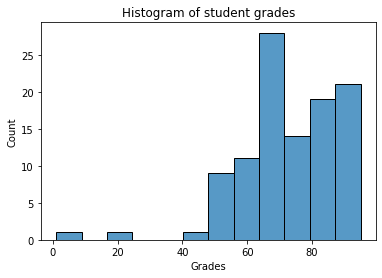

In [ ]:
sns.histplot(grades['Grades']).set(title='Histogram of student grades')

### Question 3. Plot the grades as a one-dimension scatterplot:

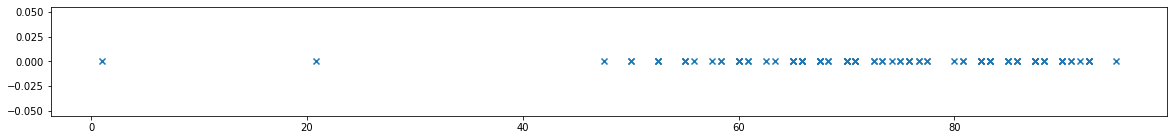

In [ ]:
# Plot the grades
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x')

Using this graphical representation, how many groups / clusters do you think there are?

### Question 4. Fit a KMeans algorithm for k=2, random_state=0, as shown in the walkthrough

In [ ]:
# YOUR CODE HERE

In [ ]:
# create an instace
model2=KMeans(n_clusters=2, random_state=0)

# fit the model on grades
model2.fit(grades)

KMeans(n_clusters=2, random_state=0)

### Question 5. Print the resulting model labels, the cluster centers and make a one-dimension scatterplot with the grades colored by the cluster they belong to.

In [ ]:
# YOUR CODE HERE

In [ ]:
model2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model2.cluster_centers_

array([[61.46415094],
       [84.19769231]])

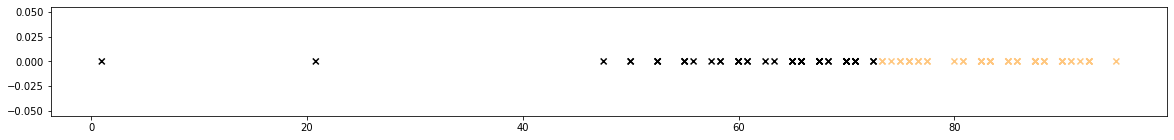

In [ ]:
# Plot the grades for 2 clusters
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')

Add the cluster centers to your scatterplot above

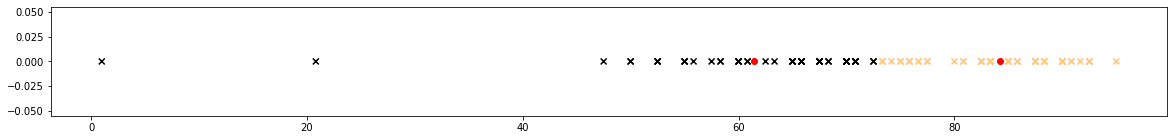

In [ ]:
# Plot the grades
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=model2.labels_, cmap='copper')
plt.scatter(model2.cluster_centers_, np.zeros_like(model2.cluster_centers_), color='red')

Below you can see the same code iterated for several values of k. Using this graphial representation, which seems to be the optimal value of k?

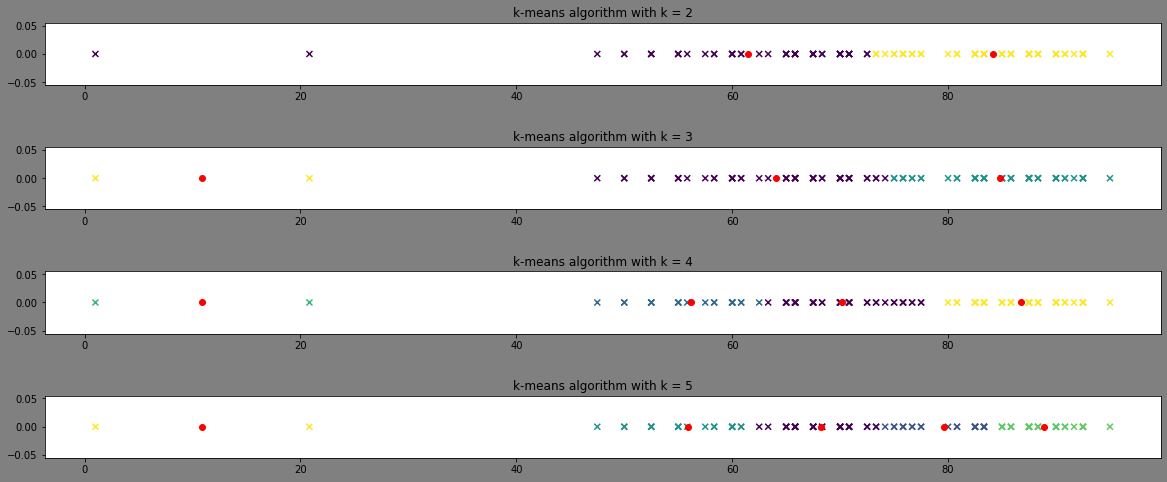

In [ ]:
# Fit k-means algorithm for different k
fig, ax = plt.subplots(4, 1, figsize=(20, 8), facecolor="grey")
for k in [2, 3, 4, 5]:
  # Create instance of class
  model = KMeans(n_clusters=k)
  # Fit model
  model.fit(grades)
  # Get centers of clusters
  centers = model.cluster_centers_
  # Get labels
  labels = model.labels_
  # Plot the points, colored by associated cluster
  ax[k-2].scatter(grades, np.zeros_like(grades), marker='x', c=labels, cmap='viridis')
  # Plot the center of each cluster
  ax[k-2].scatter(centers, np.zeros_like(centers), color='red')
  ax[k-2].set_title('k-means algorithm with k = ' + str(k))
plt.subplots_adjust(hspace=1)

### Question 6. Use the elbow method to find the optimal value of k.

In [ ]:
# YOUR CODE HERE

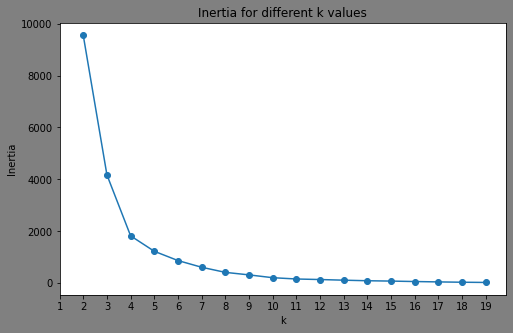

In [ ]:
# Elbow Method - inertia
inertia = []
k_values = range(2, 20)
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(grades)
  inertia.append(model.inertia_)

# Plot
plt.figure(figsize=(8,5), facecolor="grey")
plt.plot(k_values, inertia, marker='o', linestyle='solid')
plt.title('Inertia for different k values')
plt.ylabel('Inertia')
plt.xlabel('k')
plt.xticks(np.arange(min(k_values)-1, max(k_values)+1, step=1))
plt.show()

The inertia is defined as the sum of squared distances of each sample to their closest cluster center. This is the cost function that the KMeans algorithm minimizes. From k=4 we see that the reduction in the cost function is much lower than for example for k=1.

### Question 7. Use an AgglomerativeClustering model, with 5 clusters, euclidean distance and average linkage to partition the grades

In [ ]:
# YOUR CODE BELOW

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
clustering.fit(grades)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [ ]:
clustering.labels_

array([3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Question 8. Use the one-dimensional scatter plot to show how the clusters were formed with the hierachical clustering model trained above

In [ ]:
# YOUR CODE HERE

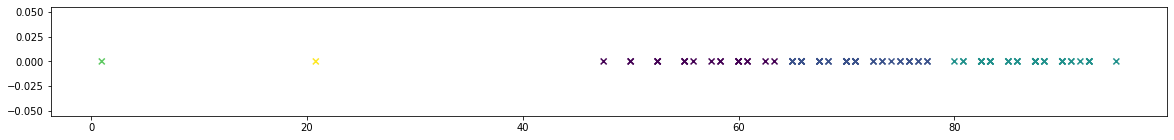

In [ ]:
# Plot the grades colored by the labels of the hierarchical model trained above 
plt.figure(figsize=(20,2))
plt.scatter(grades, np.zeros_like(grades), marker='x', c=clustering.labels_, cmap='viridis')

### Question 9. Plot the dendrogram for the hierarchical clustering model trained above

In [ ]:
# YOUR CODE HERE

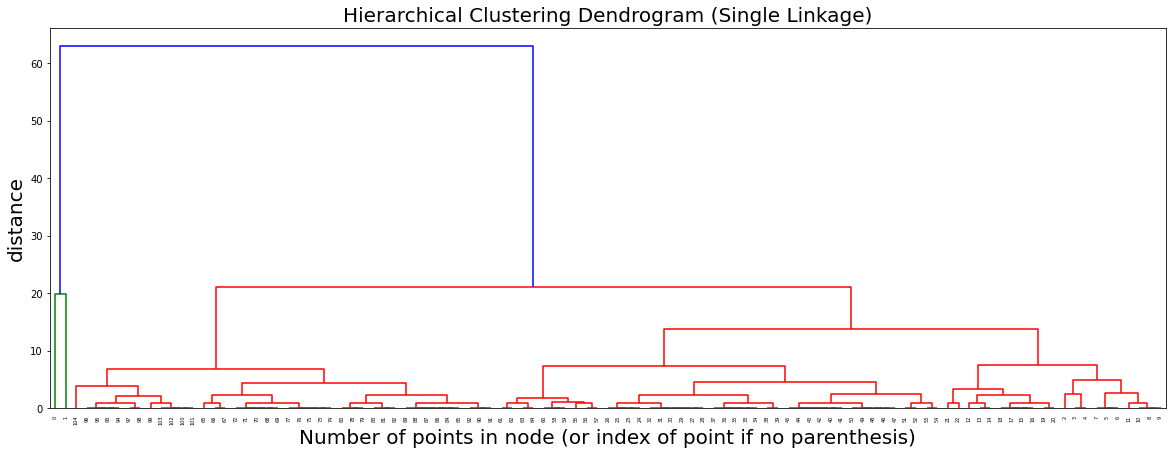

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20, 7))
plt.title('Hierarchical Clustering Dendrogram (Single Linkage)', fontsize=20)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', fontsize=20)
plt.ylabel('distance', fontsize=20)

Z = linkage(grades, method='average', metric='euclidean') #Provide the linkage method we want and the chosen distance metric.
dendrogram(Z) #compute the dendogram according the linkage

plt.show()